In [39]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[201 202 203 ... 196 193 198]
 [198 198 199 ... 196 193 198]
 [195 196 197 ... 197 193 199]
 ...
 [197 197 197 ... 195 196 196]
 [196 196 196 ... 194 195 196]
 [195 195 195 ... 194 194 195]]


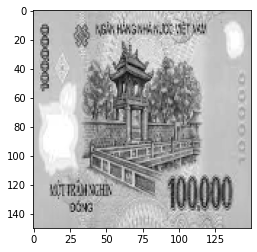

In [40]:
datadir = "/content/drive/MyDrive/MoneyVN"
categories=['100000VND','10000VND','1000VND','200000VND','20000VND','2000VND','500000VND','50000VND','5000VND']
img_size=150
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [41]:
#Create training data:
training_data=[]
def create_traning_data():
  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array =cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 17/17 [00:00<00:00, 346.38it/s]

159


In [42]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
 x.append(features)
 y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (159, 150, 150, 1)
y (159,)


In [43]:
#saving x, y as file.pickle into drive
pickle_out = open("/content/drive/MyDrive/MoneyVN_save/Save/x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/MoneyVN_save/Save/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [44]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop 
from sklearn.model_selection import train_test_split

In [45]:
pickle_in = open("/content/drive/MyDrive/MoneyVN_save/Save/x.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/MoneyVN_save/Save/y.pickle","rb")
Y_train = pickle.load(pickle_in)

In [46]:
X_train=X_train/255.0
print('X train',X_train.shape)
print('Y train',Y_train.shape)

X train (159, 150, 150, 1)
Y train (159,)


In [47]:
#one hot encoding
Y_train= to_categorical(y,9)

In [48]:
Y_train.shape

(159, 9)

In [49]:
model=Sequential()

In [50]:
#layer1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

In [51]:
#layer2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

In [52]:
#layer3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

In [53]:
model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                      

In [54]:
from tensorflow.keras.optimizers import SGD
opt =SGD(learning_rate=0.01, momentum=0.9)

In [55]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
history = model.fit(X_train,Y_train,batch_size=128,epochs=150,verbose=1,validation_split=0.1)

Epoch 1/150
2/2 [==============================] - 1s 227ms/step - loss: 7.7014 - accuracy: 0.0699 - val_loss: 10.6573 - val_accuracy: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 82ms/step - loss: 9.4550 - accuracy: 0.1329 - val_loss: 2.5545 - val_accuracy: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 74ms/step - loss: 2.2781 - accuracy: 0.1189 - val_loss: 2.3652 - val_accuracy: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 73ms/step - loss: 2.2063 - accuracy: 0.1469 - val_loss: 2.3325 - val_accuracy: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 74ms/step - loss: 2.1887 - accuracy: 0.1119 - val_loss: 2.3572 - val_accuracy: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 75ms/step - loss: 2.1753 - accuracy: 0.1399 - val_loss: 2.4431 - val_accuracy: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 71ms/step - loss: 2.1643 - accuracy: 0.1469 - val_loss: 2.6204 - val_accuracy: 0

In [57]:
model.save('MoneyVN.h5')

In [58]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

In [59]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(150, 150))

    return img
labels = {0:'100000VND',
          1:'10000VND',
          2:'1000VND',
          3:'200000VND',
          4:'20000VND',
          5:'2000VND',
          6:'500000VND',
          7:'50000VND',
          8:'5000VND'}

In [ ]:
#model = load_model('FoodVN.h5')

[[0.0000000e+00 6.7019011e-19 1.5691619e-09 2.9679534e-28 4.3570775e-08
  1.0000000e+00 4.5432027e-18 3.1144829e-14 0.0000000e+00]]
expectation: 2000VND


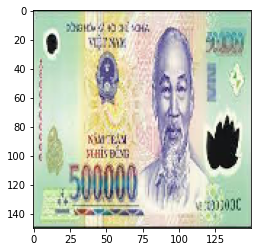

In [62]:
#load img and test:
img = load_image('/content/drive/MyDrive/MoneyVN/500000VND/download (11).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,150,150,1) 
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation:',labels[np.argmax(result)])